In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)
pd.options.display.max_info_columns = 999



In [2]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None, ic_=None):
    if (pd_ == None) and (ic_ == None):
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    elif (pd_ != None) and (ic_ == None):
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    elif (pd_ != None) and (ic_ != None):
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_, index_col = ic_)
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), index_col = ic_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of dictionary
def pdc(dict_):
    print(len(dict_))
    return dict_

Read in our data, pick a variable and plot a histogram of it.

In [3]:
# Import our libraries
import matplotlib.pyplot as plt
import pandas as pd

# read in our data
nutrition = pd.read_csv(os.path.join('.', 'starbucks_drinkMenu_expanded.csv'))
p(nutrition)


(242, 18)


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [4]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
nutrition.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [6]:
#get hist for categorical variables and label x axis with category

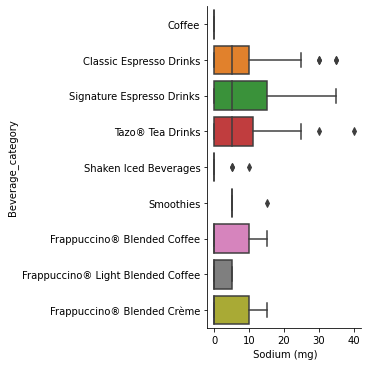

In [7]:
sns.catplot(x=" Sodium (mg)", y="Beverage_category", kind="box", data=nutrition)


In [17]:
nutrition.loc[nutrition.loc[:, 'Caffeine (mg)'] == 'Varies', :] = np.nan
nutrition.loc[nutrition.loc[:, 'Caffeine (mg)'] == 'varies', :] = np.nan
nutrition.loc[:, 'Caffeine (mg)'].value_counts()

75     37
0      35
150    34
70     14
95     11
110     9
130     7
25      6
120     6
90      4
175     4
30      3
15      3
145     3
10      3
180     3
125     3
85      3
100     3
55      3
140     3
50      3
80      3
170     3
20      3
165     2
410     1
260     1
330     1
235     1
65      1
300     1
105     1
225     1
Name: Caffeine (mg), dtype: int64

In [ ]:
nutrition.loc[:, (nutrition.loc[:, 'Caffeine (mg)'] == 'Varies')] = np.nan
nutrition.loc[:, (nutrition.loc[:, 'Caffeine (mg)'] == 'varies')] = np.nan
p(nutrition)

In [ ]:
nutrition.loc[:, 'Caffeine (mg)'].astype('int64')
nutrition[['Caffeine (mg)']].sort_values()

In [27]:
nutrition[['Caffeine (mg)']]

,Caffeine (mg)
0,175
1,260
2,330
3,410
4,75
5,75
6,75
7,75
8,75
9,75


ConversionError: Failed to convert value(s) to axis units: 0         175
1         260
2         330
3         410
4          75
5          75
6          75
7          75
8          75
9          75
10        150
11        150
12        150
13        150
14        150
15        150
16         85
17         85
18         85
19         95
20         95
21         95
22        175
23        175
24        175
25        180
26        180
27        180
28         75
29         75
30         75
31         75
32         75
33         75
34        150
35        150
36        150
37        150
38        150
39        150
40         75
41        150
42        225
43        300
44         75
45         75
46         75
47         75
48         75
49         75
50        150
51        150
52        150
53        150
54        150
55        150
56         75
57        150
58         75
59         75
60        150
61        150
62         75
63         75
64         75
65         75
66         75
67         75
68        150
69        150
70        150
71        150
72        150
73        150
74         75
75         75
76         75
77         75
78         75
79         75
80        150
81        150
82        150
83        150
84        150
85        150
86         10
87         10
88         10
89         20
90         20
91         20
92         25
93         25
94         25
95         30
96         30
97         30
98          0
99          0
100         0
101         0
102    Varies
103    Varies
104    Varies
105    Varies
106        50
107        50
108        50
109        70
110        70
111        70
112        95
113        95
114        95
115       120
116       120
117       120
118        25
119        25
120        25
121        55
122        55
123        55
124        80
125        80
126        80
127       110
128       110
129       110
130    varies
131    varies
132    varies
133    varies
134    varies
135    varies
136    varies
137    varies
138    varies
139    varies
140    varies
141    varies
142         0
143         0
144         0
145         0
146         0
147         0
148         0
149         0
150         0
151         0
152         0
153         0
154       120
155       165
156       235
157        90
158       NaN
159        90
160        90
161       125
162       125
163       125
164       170
165       170
166       170
167    Varies
168    Varies
169    Varies
170    Varies
171    Varies
172    Varies
173        15
174        15
175        15
176         0
177         0
178         0
179         0
180         0
181         0
182        70
183        70
184        70
185        95
186        95
187        95
188       130
189       130
190       130
191        70
192        70
193       110
194       110
195       110
196       140
197       140
198       140
199        70
200        70
201        70
202       100
203       100
204       100
205       130
206       130
207       130
208        75
209        75
210        75
211       110
212       110
213       110
214       145
215       145
216       145
217        70
218        95
219       120
220        70
221        95
222       130
223        65
224        90
225       120
226        70
227       105
228       165
229         0
230         0
231         0
232         0
233         0
234         0
235         0
236         0
237         0
238         0
239         0
240         0
241         0
Name: x, dtype: object

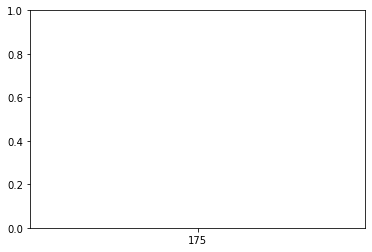

In [23]:
sns.histplot(data=nutrition, x='Caffeine (mg)')

In [22]:
sns.catplot(x='Caffeine (mg)', y="Beverage_category", kind="box", data=nutrition)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [4]:
nutrition

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [5]:
# look at only the numeric columns
nutrition.describe()
# This version will show all the columns, including non-numeric
# nutrition.describe(include="all")

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


Plot a histogram using matplotlib.

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


Text(0.5, 1.0, 'Sodium in Starbucks Menu Items')

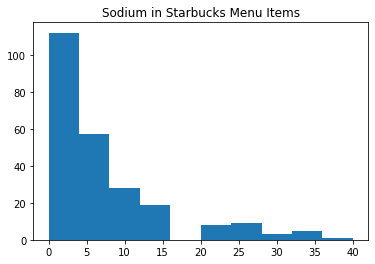

In [6]:
# list all the coulmn names
print(nutrition.columns)

# get the sodium column
sodium = nutrition[" Sodium (mg)"]

# Plot a histogram of sodium content
plt.hist(sodium)
plt.title("Sodium in Starbucks Menu Items")

Plot a histogram using matplotlib with some extra fancy stuff (thanks to the Twitch chat for helping out!)

Text(0, 0.5, 'Count')

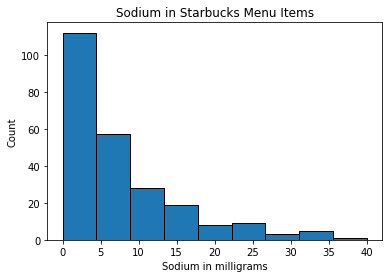

In [7]:
# Plot a histogram of sodium content with nine bins, a black edge 
# around the columns & at a larger size
plt.hist(sodium, bins=9, edgecolor = "black")
plt.title("Sodium in Starbucks Menu Items") # add a title
plt.xlabel("Sodium in milligrams") # label the x axes 
plt.ylabel("Count") # label the y axes

Plot a histogram using the pandas wrapper of matplotlib.

array([[<AxesSubplot:title={'center':' Sodium (mg)'}>]], dtype=object)

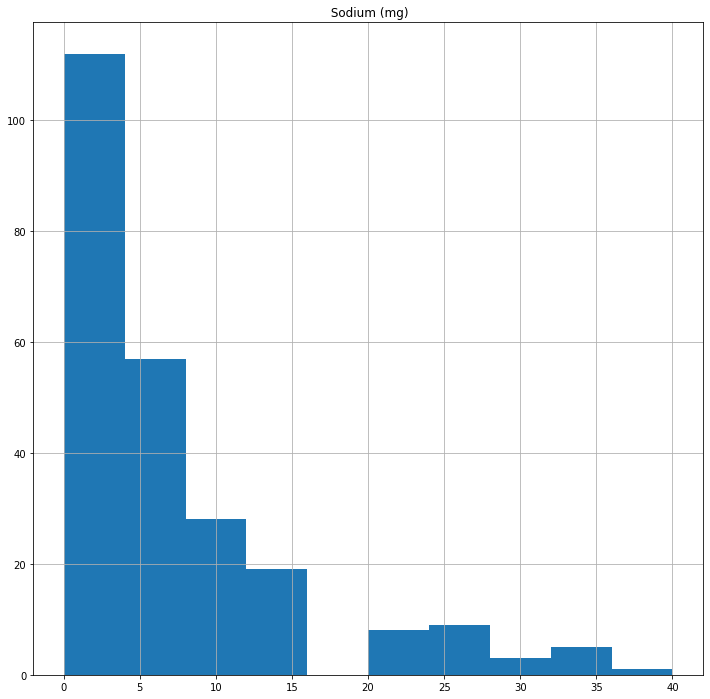

In [8]:
### another way of plotting a histogram (from the pandas plotting API)
# figsize is an argument to make it bigger
nutrition.hist(column= " Sodium (mg)", figsize = (12,12))